<a href="https://colab.research.google.com/github/VeePollux/Calculo_Numerico_Computacional/blob/main/Relatorio1_VanessaAldrighi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Relatório 1

#Imports


In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.plotting.plot import PlotGrid
from prettytable import PrettyTable

#Métodos

##Bissecção

In [ ]:
def bisseccao(f, a, b, precisao, n, table):
    if(f(a)*f(b) > 0):
      print("Erro: Método não é aplicável.")
      return None

    table.field_names = ["i", "a", "b", "x", "f(x)"]
    for i in range(n):
      if((b - a)>= precisao):
        x = (a+b)/2
        if(f(a)*f(x)>0):
          a = x
        else:
          b = x
      else:
        x = random.uniform(a, b)
        table.add_row([i+2, a, b, x, f(x)])
        print(table)
        return
      table.add_row([i+1, a, b, x, f(x)])
    print(table)

##Falsa Posição

In [ ]:
def falsaPosicao(f, a, b, precisao, n, table):
  if(f(a)*f(b) > 0):
      print("Erro: Método não é aplicável.")
      return None

  table.field_names = ["i", "a", "b", "x", "f(x)"]
  for i in range(n):
    x = (a*f(b) - b*f(a))/(f(b) - f(a))
    table.add_row([i+1, a, b, x, f(x)])
    if(a == x or n == x):
      print(table)
      return
    if((b - a)> precisao):
      if(f(a)*f(x)>0):
        a = x
      else:
        b = x
    else:
        x = random.uniform(a, b)
        table.add_row([i+2, a, b, x, f(x)])
        print(table)
        return
  print(table)

##Newton-Raphson

In [ ]:
def newtonRaphson(f, df, x0, precisao, n, table):
  table.field_names = ["i", "x", "f(x)"]
  if(abs(f(x0))< precisao):
    table.add_row([1, x0, f(x0)])
  else:
    x = x0 - (f(x0)/df(x0))
    table.add_row([1, x0, f(x0)])
    for i in range(n-1):
      table.add_row([i+2, x, f(x)])
      if(abs(f(x))< precisao or abs(x - x0) < precisao):
          print(table)
          return
      else:
        x0 = x
        x = x0 - (f(x0)/df(x0))
  print(table)

##Secante

In [ ]:
def secante(f, x0, x1, precisao, n, table):
  table.field_names = ["i", "x", "f(x)"]
  table.add_row(["x0", x0, f(x0)])
  if(abs(f(x0))< precisao):
    table.add_row([1, x0, f(x0)])
  else:
    table.add_row(["x1",x1, f(x1)])
    if(abs(f(x1))< precisao or abs(x1 - x0)< precisao):
       table.add_row([1, x1, f(x1)])
    else:
      for i in range(n):
        x2 = x1 - ((f(x1)/(f(x1)-f(x0)))*(x1-x0));
        table.add_row([i+1, x2, f(x2)])
        if(abs(f(x2))< precisao or abs(x2 - x1)< precisao):
           print(table)
           return
        else:
          x0 = x1;
          x1 = x2;
  print(table)


#Questões

In [ ]:
def graf(f, curva):
  valores = [f(valor) for valor in curva]
  plt.plot(curva, valores, 'r')
  plt.title('Gráfico da função')
  plt.xlabel('x')
  plt.ylabel('F(x)')
  plt.axhline(y = 0, color = "black", linestyle = "-")
  plt.grid()
  plt.show()

##Questão 1

A população de uma determinada bactéria segue a forma da seguinte função:

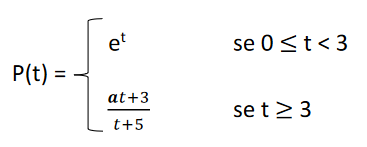

e^t = (at + 3)/(t + 5)

t = 3

e^3 = (a3 + 3)/(3-+5)

f(a) = -(3a + 3)/8 + e^3

Use o Método da Bissecção para encontrar o valor de a.

Observação: Comece traçando um gráfico para encontrar um intervalo apropriado paraa raiz. Utilize tol = 0,0001

**Resposta**

"a" é aproximadamente 52.56142268171605.

In [ ]:
f1Q1 = lambda x: math.exp(x)
f2Q1 = lambda x: -(3*x + 3)/8 + math.exp(3)

Primeira função:



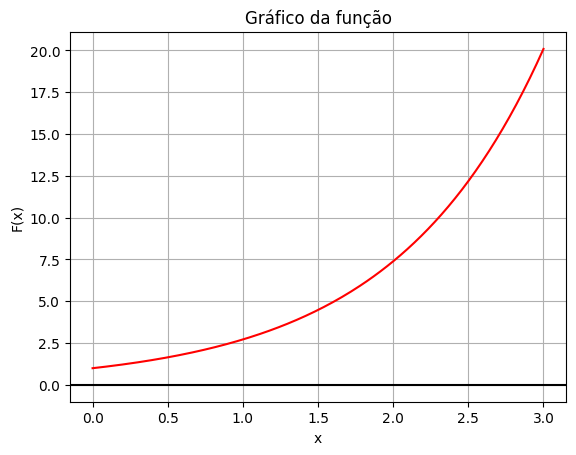


Segunda função:



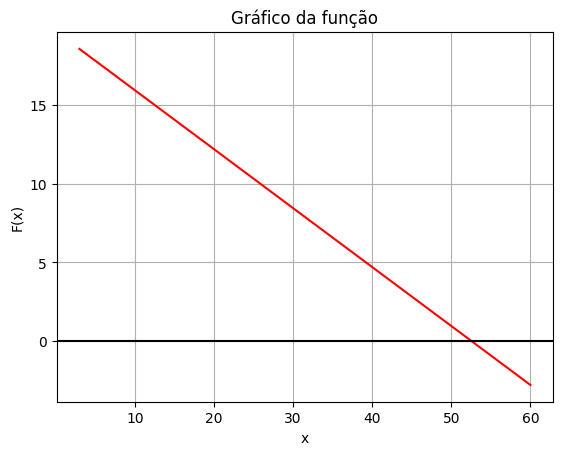

In [ ]:
print("Primeira função:\n")
curva1Q1 = np.linspace(3, 0, 200)
graf(f1Q1, curva1Q1)
print("\nSegunda função:\n")
curva2Q1 = np.linspace(60, 3, 200)
graf(f2Q1, curva2Q1)

In [ ]:
table1Q1 = PrettyTable()
bisseccao(f2Q1, 3, 60, 0.0001, 100, table1Q1)


+----+--------------------+-------------------+--------------------+-------------------------+
| i  |         a          |         b         |         x          |           f(x)          |
+----+--------------------+-------------------+--------------------+-------------------------+
| 1  |        31.5        |         60        |        31.5        |    7.898036923187668    |
| 2  |       45.75        |         60        |       45.75        |    2.554286923187668    |
| 3  |       45.75        |       52.875      |       52.875       |   -0.11758807681233208  |
| 4  |      49.3125       |       52.875      |      49.3125       |    1.218349423187668    |
| 5  |      51.09375      |       52.875      |      51.09375      |    0.5503806731876679   |
| 6  |     51.984375      |       52.875      |     51.984375      |   0.21639629818766792   |
| 7  |     52.4296875     |       52.875      |     52.4296875     |   0.049404110687667924  |
| 8  |     52.4296875     |    52.65234375    |   

##Questão 2

Aplique o Método de Newton-Raphson para calcular a raiz de f(x) = x3 – 100
cos(x) com tol = 0,001.

a) considere x0 = 1


b) considere x0 = -1

O que acontece quando os valores de estimativa inicial são alterados?
Justifique sua resposta.

  **Resposta**  

Quando os valores de estimativa são alterados a resposta da convergência usando o método de Newton-Raphson também é alterada. Isso se dá devido a mudança da distância entre o valor inicial atribuido para X e a distância da convergência mais próxima.

In [ ]:
x = Symbol('x')
fQ2 = x**3 - 100*cos(x)
dfQ2 = diff(fQ2, x)

fQ2 = lambdify(x, fQ2)
dfQ2 = lambdify(x, dfQ2)

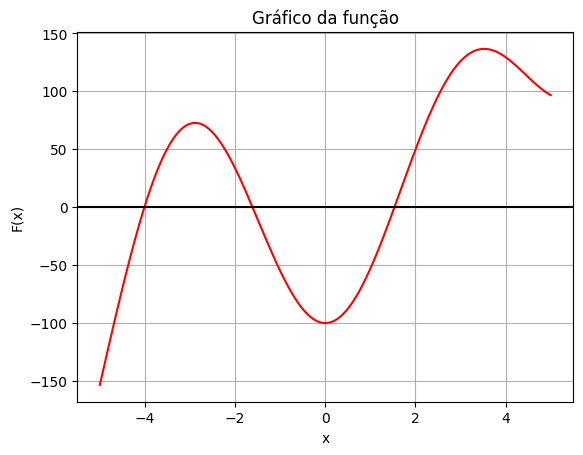

In [ ]:
curva1Q2 = np.linspace(5, -5, 200)
graf(fQ2, curva1Q2)

In [ ]:
print("A)")
table1Q2 = PrettyTable()
newtonRaphson(fQ2, dfQ2, 1, 0.001, 5, table1Q2)
print("B)")
table2Q2 = PrettyTable()
newtonRaphson(fQ2, dfQ2, -1, 0.001, 5, table2Q2)

A)
+---+--------------------+-----------------------+
| i |         x          |          f(x)         |
+---+--------------------+-----------------------+
| 1 |         1          |   -53.03023058681398  |
| 2 | 1.6085140126438489 |   7.932610525842988   |
| 3 | 1.5348530464990653 |  0.02221255868168459  |
| 4 | 1.5346454577941748 | 2.759932953289024e-07 |
+---+--------------------+-----------------------+
B)
+---+---------------------+-------------------------+
| i |          x          |           f(x)          |
+---+---------------------+-------------------------+
| 1 |          -1         |    -55.03023058681398   |
| 2 | -1.6781540143402855 |    5.989138970510213    |
| 3 |  -1.612321697070812 |   -0.04001753895561233  |
| 4 | -1.6127561270429593 | -1.3060651333773876e-06 |
+---+---------------------+-------------------------+


##Questão 3

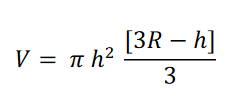


Se R = 3m, até qual profundidade o tanque deve ser enchido para conter 30 m3?

f = -h³ - 9*h² + 90/pi

Use três iterações do Método da Falsa Posição para obter a resposta. Determine
o erro relativo aproximado após cada iteração.

**Resposta**

Erro Relativo = (valor exato de X - valor aproximado de X)/(valor aproximado de X)

Valor exato de X = 1.64081

Erro Relativo Iteração 1: (1.64081 - 0.55092)/0.55092 = 1.97830

Erro Relativo Iteração 2: (1.64081 - 0.98392)/0.98392 = 0.66762

Erro Relativo Iteração 3: (1.64081 - 1.27259)/1.27259 = 0.28934


In [ ]:
f1Q3 = lambda x: -x**3 - 9*x**2 + 90/math.pi

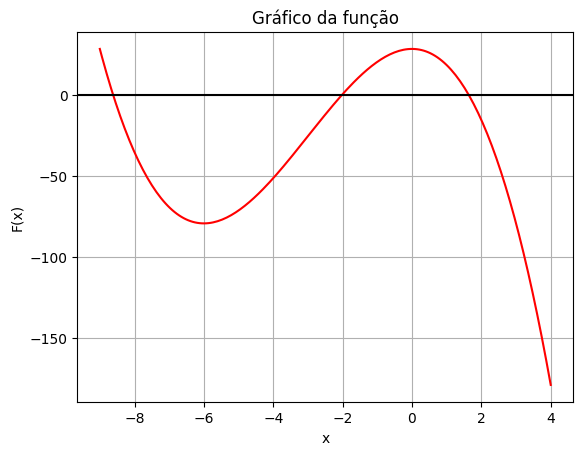

In [ ]:
curva1Q3 = np.linspace(4, -9, 200)
graf(f1Q3, curva1Q3)

In [ ]:
table1Q3 = PrettyTable()
falsaPosicao(f1Q3, 0, 4, 0.0001, 3, table1Q3)

+---+--------------------+---+--------------------+--------------------+
| i |         a          | b |         x          |        f(x)        |
+---+--------------------+---+--------------------+--------------------+
| 1 |         0          | 4 | 0.5509209568565608 | 25.74905248161245  |
| 2 | 0.5509209568565608 | 4 | 0.9839293129046273 | 18.982279132267266 |
| 3 | 0.9839293129046273 | 4 | 1.272592796051945  | 12.011503542711434 |
+---+--------------------+---+--------------------+--------------------+


##Questão 4

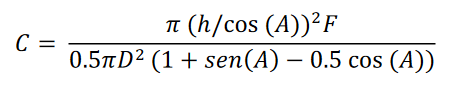

 em que A é o ângulo do campo, F é a cobertura da fração do campo com
espelhos, D é o diâmetro do coletor e h é o comprimento do coletor.

Considerando h = 300, F = 0,8 e D = 14, calcule o ângulo positivo A inferior a
pi/25 para o qual a concentração do fator C é 1200.



Utilize o método iterativo mais adequado e considere no critério de paragem ε1 = ε2 = 10−3 ou no máximo 3 iterações.

**Resposta**

Considerei o método mais adequado o método da secante. Método da bissecção e falsa posição não são aplicáveis. Ambos os métodos secante e Newton-Raphson chegam em uma convergência equivalente, sendo Newton-Raphson o mais aproximado, no entanto como ele exige o cálculo de derivada e utiliza apenas um ponto inicial, considerei o método da secante como mais seguro de ser utilizado.

In [ ]:
x = Symbol('x')
f1Q4 = (1200*(98*math.pi*(1+sin(x) - 0.5*cos(x))))/(0.8*math.pi*((300/cos(x))**2))
df1Q4 = diff(f1Q4, x)

f1Q4 = lambdify(x, f1Q4)
df1Q4 = lambdify(x, df1Q4)

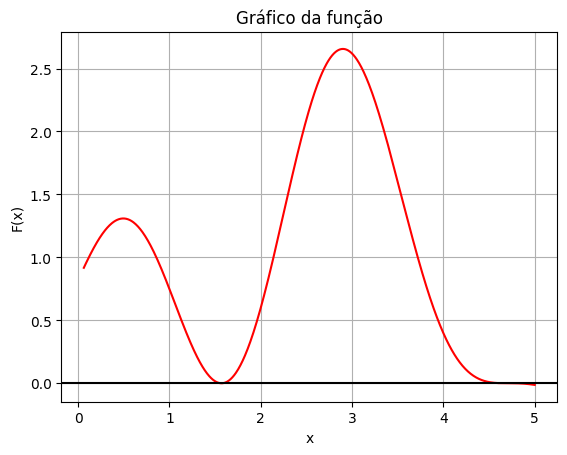

In [ ]:
curva1Q4 = np.linspace(5, (math.pi/25)/2, 1000)
graf(f1Q4, curva1Q4)

In [ ]:
print("Método Secante")
table1Q4 = PrettyTable()
secante(f1Q4, (math.pi/25)/2, math.pi/25, 0.001, 10, table1Q4)

#print("Método Newton-Raphson")
#table2Q4 = PrettyTable()
#newtonRaphson(f1Q4, df1Q4, math.pi/25,  0.001, 10, table2Q4)


Método Secante
+----+---------------------+-----------------------+
| i  |          x          |          f(x)         |
+----+---------------------+-----------------------+
| x0 | 0.06283185307179587 |   0.9172054868177083  |
| x1 | 0.12566370614359174 |   1.0116718905494158  |
| 1  | -0.5472233422974331 |  0.06276790171507403  |
| 2  | -0.5917333334228534 |  0.030617171717464493 |
| 3  | -0.6341202416371036 |  0.00501843343378482  |
| 4  | -0.6424298651419768 | 0.0005614034050603912 |
+----+---------------------+-----------------------+


##Questão 5

Compare os Métodos da Bissecção, Métodos da Falsa Posição, Métodos de
Newton-Raphson e Métodos da Secante quando aplicados nas funções abaixo.
Para isso, utilize em todos os método o mesmo critério de parada, o número
máximo de iterações 500 e tolerância de 10-10.

Para o Método de Newton, considere x0 como o ponto médio do intervalo dado.

a) f(x) = 2x4 + 4x3 + 3x2 – 10x –15 [0,3]

b) f(x) = sen(x) x+ 4 [1,5]

c) f(x) = (x – 3)5 ln(x) [2,5]

**Resposta**

Através dos resultados podemos ver que os métodos com maior melhores resultados são o Newton-Raphson e Secante, com destaque principalmente no primeiro método citado. Podemos ver também que funções onde há um grande intervalo no qual a linha de resultados da função está proxima da convergência tendem a ter maiores quantidades de iterações em todos os métodos, os mais afetados por isso são Bissecção e Falsa Posição, com destaque no segundo método citado.


In [ ]:
x = Symbol('x')
f1Q5 = 2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15
df1Q5 = diff(f1Q5, x)
f1Q5 = lambdify(x, f1Q5)
df1Q5 = lambdify(x, df1Q5)

f2Q5 = sin(x)*x + 4
df2Q5 = diff(f2Q5, x)
f2Q5 = lambdify(x, f2Q5)
df2Q5 = lambdify(x, df2Q5)

f3Q5 = ((x - 3)**5)*(log(x))
df3Q5 = diff(f3Q5, x)
f3Q5 = lambdify(x, f3Q5)
df3Q5 = lambdify(x, df3Q5)

A)



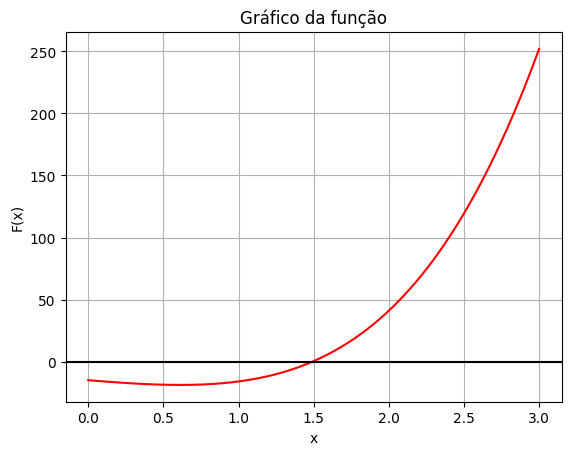


B)



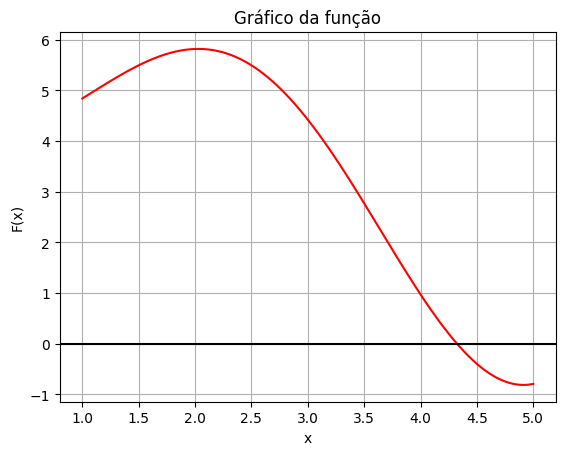


C)



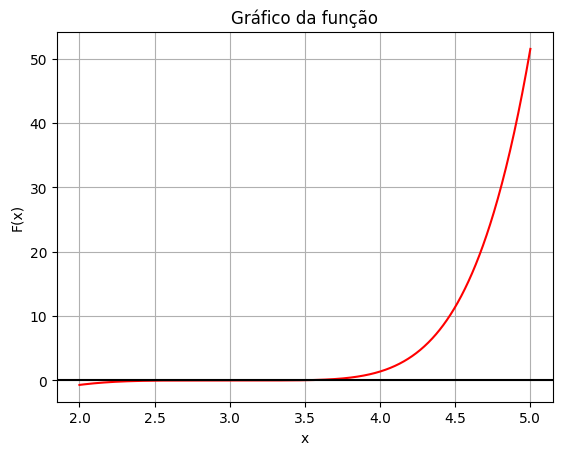

In [ ]:
print("A)\n")
curva1Q5 = np.linspace(3, 0, 1000)
graf(f1Q5, curva1Q5)
print("\nB)\n")
curva2Q5 = np.linspace(5, 1, 1000)
graf(f2Q5, curva2Q5)
print("\nC)\n")
curva3Q5 = np.linspace(5, 2, 1000)
graf(f3Q5, curva3Q5)

In [ ]:
print("------Função A------")
print("Método Bissecção:")
table1Q5 = PrettyTable()
bisseccao(f1Q5, 0, 3, 0.000000001,500, table1Q5)

print("Método Falsa Posição:")
table2Q5 = PrettyTable()
falsaPosicao(f1Q5, 0, 3, 0.000000001, 500, table2Q5)

print("Método Newton-Raphson:")
table3Q5 = PrettyTable()
newtonRaphson(f1Q5, df1Q5, 1.5, 0.000000001, 500, table3Q5)

print("Método Secante:")
table4Q5 = PrettyTable()
secante(f1Q5, 0, 3, 0.000000001, 500, table4Q5)

print("------Função B------")
print("Método Bissecção:")
table5Q5 = PrettyTable()
bisseccao(f2Q5, 1, 5, 0.000000001, 500, table5Q5)

print("Método Falsa Posição:")
table6Q5 = PrettyTable()
falsaPosicao(f2Q5, 1, 5, 0.000000001, 500, table6Q5)

print("Método Newton-Raphson:")
table7Q5 = PrettyTable()
newtonRaphson(f2Q5, df2Q5, 2, 0.000000001, 500, table7Q5)

print("Método Secante:")
table8Q5 = PrettyTable()
secante(f1Q5, 1, 5, 0.000000001, 500, table8Q5)

print("------Função C------")
print("Método Bissecção:")
table9Q5 = PrettyTable()
bisseccao(f3Q5, 2, 5, 0.000000001, 500, table9Q5)

print("Método Falsa Posição:")
table10Q5 = PrettyTable()
falsaPosicao(f3Q5, 2, 5, 0.000000001, 500, table10Q5)

print("Método Newton-Raphson:")
table11Q5 = PrettyTable()
newtonRaphson(f3Q5, df3Q5, 1.5, 0.000000001, 500, table11Q5)

print("Método Secante:")
table12Q5 = PrettyTable()
secante(f3Q5, 2, 5, 0.000000001, 500, table12Q5)

------Função A------
Método Bissecção:
+----+--------------------+--------------------+--------------------+-------------------------+
| i  |         a          |         b          |         x          |           f(x)          |
+----+--------------------+--------------------+--------------------+-------------------------+
| 1  |         0          |        1.5         |        1.5         |          0.375          |
| 2  |        0.75        |        1.5         |        0.75        |       -18.4921875       |
| 3  |       1.125        |        1.5         |       1.125        |     -13.55419921875     |
| 4  |       1.3125       |        1.5         |       1.3125       |    -7.977996826171875   |
| 5  |      1.40625       |        1.5         |      1.40625       |    -4.184904098510742   |
| 6  |      1.453125      |        1.5         |      1.453125      |   -2.0055445432662964   |
| 7  |     1.4765625      |        1.5         |     1.4765625      |   -0.8410257026553154   |
|